# Problem 1: One day at GAFO 03/378 

GAFO 03/378 is an office where Frederike and Anastasiia are working on theoretical models of how neutrinos are emitted from a special class of astrphysical sources called blazars. A task that is proposed to you is inspired by a real-physicist-life example. 

Neutrinos are neutral particles that interact only weakly and have very litte mass. Therefore, they are perfect "messengers" that can carry information from the far ends of the Universe. The flip side of the coin is that they are hard to detect and require the detectors of enourmous size.

Let's assume that your theory predicts a spectrum of neutrinos coming from some distant source. Now many neutrino events (i.e. detected neutrinos) will that create in the detector like IceCube? We can estimate this as

$$N_\nu = \frac{1}{3} \cdot T \cdot \int \Phi_\nu (E) \; A_{\textrm{eff}}(E)\; \textrm{d}E$$

where:

$N_\nu$ is the expected number of the neutrino events;

$T$ is a time of observation or duration of neutrino signal if it was observed completely;

$\Phi_\nu$ is neutrino flux as a function of energy, also called neutrino spectrum;

$A_{\textrm{eff}}$  is effective area of the detector (in our case IceCube), this parameter describes the efficency of the detector in detecting a muon neutrino with energy $E$;

$E$ is the neutrino energy.

If you're curious why 1/3 appears in the formula, the answer is following: neutrino oscillations. Neutrinos from far sources travel so long distances that when they arrive at Earth highly mixed, their flavor composition is $\nu_e : \nu_\mu : \nu_\tau = 1:1:1$ no matter what was their composition at the source. Most of the detectors, hovewer, are very sensitive to only one flavor and have much worse sensitivity to all other flavors, therefore, it is roughly the same at taking only 1/3 of all-flavor neutrino flux.

## (A) Prepare you input data - 8P

There are two files provided with this homework: ```IceCube_effective_area.csv``` and ```neutrino_spectrum_hw10.csv```. The first one contains two columns corresponding to the neutrino energy in __TeV__ and effective area in __m$^2$__ respectively. The second one has information on neutrino energy (first column, __eV__) and neutrino flux (second column, __erg/cm$^2$/s__).


Read these two file with ```pandas```. If the headers are missing, give the column names manually so that the first data raw is not interpreted as column names.

Make a plot for each data file in log-log scale to check what you're given (axes labels as always is a minimum requirement to show the plot to other people)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import scipy.interpolate
import scipy.integrate

In [4]:
df=pd.read_csv("IceCube_effective_area.csv",header=None, names=['energy','Aeff'])

In [5]:
df

,energy,Aeff
0,0.177369,0.002167
1,0.223947,0.004913
2,0.287122,0.010291
3,0.362425,0.019918
4,0.443496,0.035612
...,...,...
62,279868.913786,2455.283757
63,381344.932570,2955.554100
64,544151.023615,3118.282649
65,696883.376939,3377.113949


Text(0, 0.5, '$A_{eff}$, [$\\mathrm{m}^2$]')

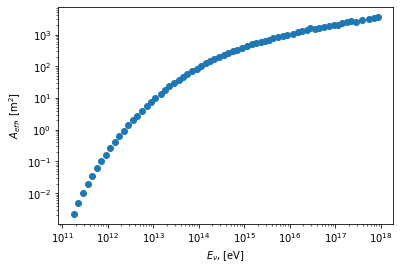

In [6]:
plt.scatter(df['energy']*1e12, df['Aeff'])
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$E_\nu$, [eV]')
plt.ylabel(r'$A_{eff}$, [$\mathrm{m}^2$]')

In [13]:
nu = pd.read_csv("neutrino_spectrum_hw10.csv")

In [14]:
nu

,E_eV,F_erg/cm^2/s
0,1.215288e+09,7.996561e-21
1,1.343101e+09,9.767014e-21
2,1.484356e+09,1.192945e-20
3,1.640467e+09,1.457065e-20
4,1.812997e+09,1.779661e-20
...,...,...
309,3.194322e+22,0.000000e+00
310,3.530272e+22,0.000000e+00
311,3.901554e+22,0.000000e+00
312,4.311884e+22,0.000000e+00


Text(0, 0.5, '$F$, [erg$\\cdot$cm$^{-2}\\cdot$s$^{-1}$]')

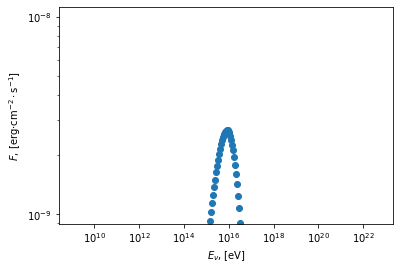

In [16]:
plt.scatter(nu["E_eV"], nu["F_erg/cm^2/s"])
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$E_\nu$, [eV]')
plt.ylabel(r'$F$, [erg$\cdot$cm$^{-2}\cdot$s$^{-1}$]')

## (B) Units conversion and interpolation - 15 P

Both your data files consist of points. What happens if you need value of the effective area at $E_\nu$ = _X_ eV but this point is not in the given array? Right, interpolation!

Make two functions that interpolate given data and that will be used in your integration. Before you rush into implementing them, consider following:

$$N_\nu (\textrm{dimensionless}) = \frac{1}{3} \cdot T \, \textrm{[s]} \cdot \int \Phi_\nu \, \left[\frac{\textrm{erg}}{\textrm{cm}^2 \cdot \textrm{s}} \right] \; A_{\textrm{eff}} \,[\textrm{m}^2] \textrm{d}E \,[\textrm{eV}] $$

It doesn't seem to work because the energy units don't cancel out, right? So the correct way to do the integration is to change flux units (and corresponding values) to

$$N_\nu (\textrm{dimensionless}) = \frac{1}{3} \cdot T \, \textrm{[s]} \cdot \int \frac{\Phi_\nu}{E^2} \, \left[\frac{\textrm{erg}}{\textrm{cm}^2 \cdot \textrm{s} \cdot \textrm{eV}^2} \right] \; A_{\textrm{eff}} \,[\textrm{m}^2] \textrm{d}E \,[\textrm{eV}] $$

Use 
$$1 \textrm{m}^2 = 10^4\, \textrm{cm}^2$$
and
$$1 \textrm{erg} = 6.242 \cdot 10^{11}\, \textrm{eV}$$

to unify the units of the expression under the integral.

Make two functions:
1. Interpolated value of $\Phi_\nu/E^2$ (that depends on neutrino energy in eV)
2. Interpolated value of $A_{\textrm{eff}}$ in cm$^2$ (that depends on neutrino energy in eV)

In [18]:
flux = scipy.interpolate.interp1d(nu["E_eV"], (nu["F_erg/cm^2/s"]*6.242e+11)/(nu["E_eV"])**2, fill_value="extrapolate")
a_eff = scipy.interpolate.interp1d(df['energy']*1e12, df['Aeff']*1e4, fill_value="extrapolate")

Text(0, 0.5, '$F/E^2$, [eV$^{-1}\\cdot$cm$^{-2}\\cdot$s$^{-1}$]')

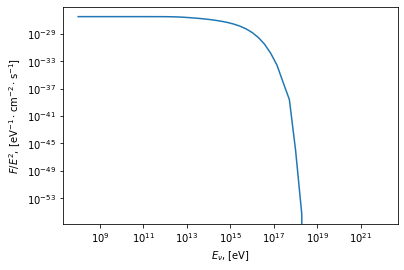

In [19]:
# just for checking
x = np.logspace(8,22)
plt.plot(x, flux(x))
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$E_\nu$, [eV]')
plt.ylabel(r'$F/E^2$, [eV$^{-1}\cdot$cm$^{-2}\cdot$s$^{-1}$]')

Text(0, 0.5, '$A_{eff}$, [$\\mathrm{m}^2$]')

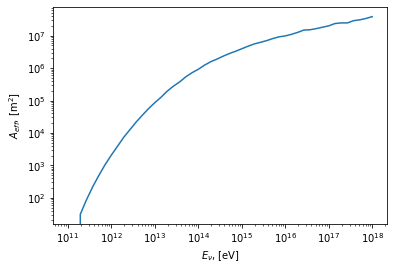

In [20]:
#just for checking
x = np.logspace(11,18)
plt.plot(x, a_eff(x))
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$E_\nu$, [eV]')
plt.ylabel(r'$A_{eff}$, [$\mathrm{m}^2$]')

## (C)  Trapezoid integration - 12 P

Time to integrate! Make an array of 100 neutrino energies equally spaced in logarithmical space between $10^{13}$ eV and $10^{18}$ eV and calculate the integral using trapezoid.

Assume the same neutrino spectrum was emitted for 5 days. Find (and print out!) the expected number of neutrino events in IceCube during this time. 

In [21]:
e = np.logspace(13,18,100)

integral = flux(e)*a_eff(e)

print(r"Number of neutrino events: ", np.trapz(integral,e)*5*24*60*60/3)

Number of neutrino events:  1.0962388166951456


## (D) Quad integration - 15 P

Calculate the same integral from $10^{13}$ eV to $10^{18}$ eV using ```quad```. __Use here lambda function!__
Find (and print out!) the same number of expected neutrino events with 5 days of emission duration.

In [22]:
integral2 = scipy.integrate.quad(lambda x: flux(x)*a_eff(x),1e13, 1e18)

In [23]:
integral2

(7.5953144227811515e-06, 1.082455118360771e-08)

In [24]:
print("Number of neutrino events: ", integral2[0]*5*24*60*60/3)

Number of neutrino events:  1.093725276880486


If you did calculations correctly, you have predicted one neutrino in IceCube! At this point usually it either was already found and your theory agrees with the observations or it was not found yet and you ping Giacomo to double check...

# Problem 2: Wird Bochum auch in Zukunft kalt bleiben? (Will Bochum remain cold in the future?)

In this exercise will will statistically analyze the temperatures in Bochum in January today and in an hypothetic warmer future.

## (A) Plot the distribution - 8P
For this exercise, assume that the temperature during a day in January in Bochum follows a Gaussian distribution. Let this Gaussian be centered at 2.5 degrees with a standard deviation of 2.5 degrees. Plot the distribution and explicitly showing mean and standard deviation values as vertical lines on the plot. Don't forget the axis labels.

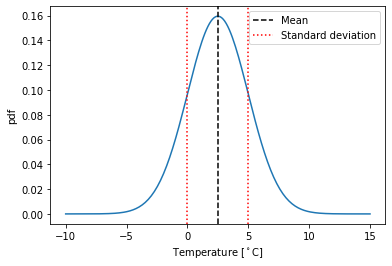

In [28]:
# Your code here

from scipy.stats import norm

temperatures = np.linspace(-10,15,200)
t_pdf = norm.pdf(temperatures, loc=2.5, scale=2.5)
t_std = norm.std(loc=2.5, scale=2.5)
t_m = norm.mean(loc=2.5, scale=2.5)

plt.plot(temperatures, t_pdf)
plt.axvline(t_m, linestyle='--', color='black', label='Mean')
plt.axvline(t_m+t_std, linestyle='dotted', color='red', label = 'Standard deviation')
plt.axvline(t_m-t_std, linestyle='dotted', color='red')

plt.xlabel(r'Temperature [$^\circ$C]')
plt.ylabel(r'pdf')

plt.legend()

## (B) Extremes probabilities - 5P
How many days would we expect on average in __January__ (31 days) with an average temperature lower than 0 degrees? And higher than 6 degrees? This number must be an integer.

In [29]:
# Your code here

days_less_0 = round(31*norm.cdf(0, loc=2.5, scale=2.5))
days_more_6 = round(31*(1-norm.cdf(6, loc=2.5, scale=2.5)))
print(f"In January we would expect {days_less_0} days with less than 0 degrees as average temperature and {days_more_6} days with more than 6 degress")

In January we would expect 5 days with less than 0 degrees as average temperature and 3 days with more than 6 degress


## (C) Probability for different extremes - 7P
You just found the average number of days that we would expect with an average temperature below 0 degrees in January in Bochum. Nevertheless, it is very likely that the exact number of days with such temperatures is different for different years. We can quantify the probability of having a different number of days. Find the probability of having in January more than 7 days with an average temperature below 0 degrees 

_Suggestion 1: You might find useful the Poisson distribution._ 

_Suggestion 2: Use the function `cdf()` with the Poisson distribution._

_Suggestion 3: If the two previous suggestions did not help and statistics is not your strong side, feel free to write an email to your tutor (or come to the tutorial!); we will provide you general explanations but will not help with the actudal code._


In [30]:
# Your code here

from scipy.stats import poisson

mu = days_less_0
print(f"Probability of having more than 7 days with less than 0 degrees as average temperature: {(1-poisson.cdf(7,mu))*100:.3}%")

Probability of having more than 7 days with less than 0 degrees as average temperature: 13.3%


## (D) Plot the Poisson distribution - 5P
Plot the Poisson distribution that you used for the task (C). Remember the labels for the axes.

Text(0, 0.5, 'Probability')

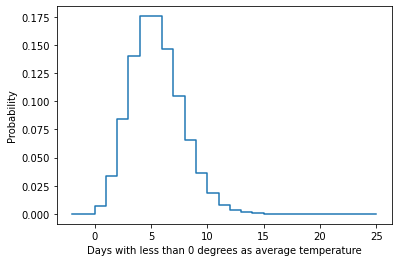

In [31]:
# Your code here

x = np.linspace(-2,25, dtype=int)

plt.step(x, poisson.pmf(x, mu), where = 'post', label = f"$\mu$ = {mu}")
plt.xlabel('Days with less than 0 degrees as average temperature')
plt.ylabel('Probability')

## (E) A look in the future - 10P
We will assume that in the future the average of the average temperature in a day in January will increase by 1.5 degrees because of the climate change. Additionally, at the same time the standard deviation of this distribution will increase by 2.5 degrees. Plot again the gaussian for the daily averages temperatures in January. How has it changed? How do the expected number of days with less than 0 degrees and more than 6 degrees in January change?

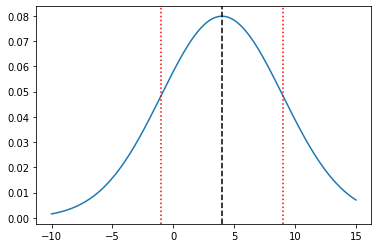

In [32]:
# Your code here

temperatures = np.linspace(-10,15,200)
loc = 4
scale = 5

t_pdf = norm.pdf(temperatures, loc=loc, scale=scale)
t_std = norm.std(loc=loc, scale=scale)
t_m = norm.mean(loc=loc, scale=scale)

plt.plot(temperatures, t_pdf)
plt.axvline(t_m, linestyle='--', color='black')
plt.axvline(t_m+t_std, linestyle='dotted', color='red')
plt.axvline(t_m-t_std, linestyle='dotted', color='red')

In [33]:
days_less_0 = round(31*norm.cdf(0, loc=loc, scale=scale))
days_more_6 = round(31*(1-norm.cdf(6, loc=loc, scale=scale)))

print(f"In January we would expect {days_less_0} days with less than 0 degrees as average temperature and {days_more_6} days with more than 6 degress")

In January we would expect 7 days with less than 0 degrees as average temperature and 11 days with more than 6 degress


## (F) A new Poisson distribution - 15P
Repeat point (C) and (D) but considering the Bochum of the future. Plot the old and the new Poisson distribution together in the same axes. How has the Poisson distribution changed? How do you interpet the new results?

In [34]:
# Your code here

mu_new = days_less_0
print(f"Probability of having more than 7 days with less than 0 degrees as average temperature: {(1-poisson.cdf(7,mu_new))*100:.3}%")

Probability of having more than 7 days with less than 0 degrees as average temperature: 40.1%


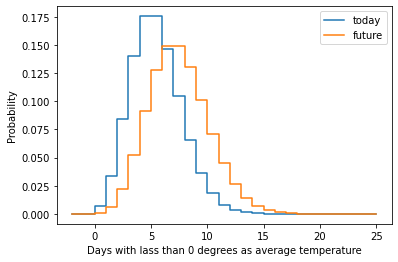

In [35]:
x = np.linspace(-2,25, dtype=int)

mu
plt.step(x, poisson.pmf(x, mu), where = 'post', label="today")
plt.step(x, poisson.pmf(x, mu_new), where = 'post', label="future")
plt.xlabel('Days with lass than 0 degrees as average temperature')
plt.ylabel('Probability')

plt.legend()

In [109]:
# Although the average temperature in January has risen, we would expect many more days with low temperatures. 
# This is due to the fact that also the standard deviation of the Gaussian distribution has increased.
# The average temperatures will yes rise, but also the number of extreme meteorological events.